# ライブラリの読み込み

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

from rdkit.Chem import MolFromSmarts, MolFromSmiles
from rdkit.Chem.Descriptors import descList
from pandas import read_csv

In [2]:
df = pd.read_csv('../data/delaney-solubility/delaney-processed.csv')
df

,Compound ID,ESOL predicted log solubility in mols per litre,Minimum Degree,Molecular Weight,Number of H-Bond Donors,Number of Rings,Number of Rotatable Bonds,Polar Surface Area,measured log solubility in mols per litre,smiles
0,Amigdalin,-0.974,1,457.432,7,3,7,202.32,-0.770,OCC3OC(OCC2OC(OC(C#N)c1ccccc1)C(O)C(O)C2O)C(O)...
1,Fenfuram,-2.885,1,201.225,1,2,2,42.24,-3.300,Cc1occc1C(=O)Nc2ccccc2
2,citral,-2.579,1,152.237,0,0,4,17.07,-2.060,CC(C)=CCCC(C)=CC(=O)
3,Picene,-6.618,2,278.354,0,5,0,0.00,-7.870,c1ccc2c(c1)ccc3c2ccc4c5ccccc5ccc43
4,Thiophene,-2.232,2,84.143,0,1,0,0.00,-1.330,c1ccsc1
...,...,...,...,...,...,...,...,...,...,...
1123,halothane,-2.608,1,197.381,0,0,0,0.00,-1.710,FC(F)(F)C(Cl)Br
1124,Oxamyl,-0.908,1,219.266,1,0,1,71.00,0.106,CNC(=O)ON=C(SC)C(=O)N(C)C
1125,Thiometon,-3.323,1,246.359,0,0,7,18.46,-3.091,CCSCCSP(=S)(OC)OC
1126,2-Methylbutane,-2.245,1,72.151,0,0,1,0.00,-3.180,CCC(C)C


## フラグメントカウント

In [3]:
def count_rings(mol):
    match = MolFromSmarts('c1ccccc1')
    ret = mol.GetSubstructMatches(match)
    n_rings = len(ret)
    return n_rings

In [4]:
def mol2freqs(mol):
    " 85 部分構造の出現回数 "
    return list(map(lambda f: f(mol), list_functions))

In [5]:
listFreq = [key for key in dict(descList).keys() if key.startswith('fr_')]
list_functions = [dict(descList)[k] for k in listFreq]

In [6]:
#func = mol2freqs # 85 部分構造の出現回数
func = count_rings # ベンゼンの数え上げ
df['Mol'] = df.smiles.apply(MolFromSmiles)
count = df.Mol.apply(func)
count

0       1
1       1
2       0
3       5
4       0
       ..
1123    0
1124    0
1125    0
1126    0
1127    1
Name: Mol, Length: 1128, dtype: int64

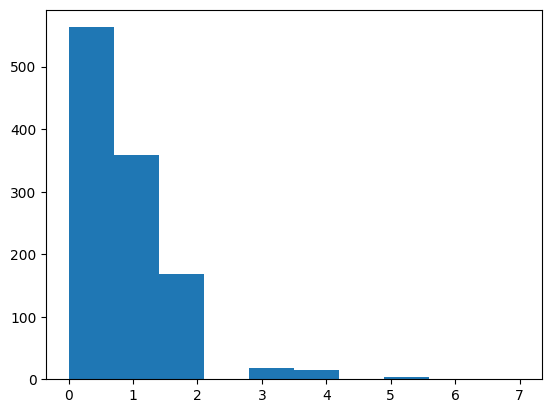

In [7]:
# 図5.1　六員環の出現回数

plt.hist(count)
plt.show()

## RDkitから呼び出すフラグメントカウントを使ったQSPR

In [8]:
from numpy import array as np_array, matrix as np_matrix

func = mol2freqs 
df['Mol'] = df.smiles.apply(MolFromSmiles)
X = df.Mol.apply(func)
X2 = np_array(X.tolist())

In [9]:
X2

array([[0, 7, 7, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 2, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [16]:
from sklearn.pipeline import make_pipeline
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import matplotlib as mpl

mpl.rcParams['figure.figsize']=[12, 8]
mpl.rcParams['font.size']=14
plt.rcParams['font.family'] = 'MS Gothic'

### 主成分分析（PCA)

In [17]:
pca = make_pipeline(StandardScaler(), PCA())
T = pca.fit_transform(X2)

In [18]:
ratio_ = dict(pca.steps)['pca'].explained_variance_ratio_

In [19]:
ratio_

array([7.63478775e-02, 5.47037955e-02, 4.53185388e-02, 4.10410177e-02,
       3.93397163e-02, 3.36832123e-02, 3.20551739e-02, 3.05790799e-02,
       2.63314623e-02, 2.60405210e-02, 2.44758196e-02, 2.42752653e-02,
       2.23852440e-02, 2.05474945e-02, 2.02990948e-02, 1.84117164e-02,
       1.82974702e-02, 1.69472784e-02, 1.67634597e-02, 1.66078148e-02,
       1.62567259e-02, 1.58672724e-02, 1.55042257e-02, 1.53698279e-02,
       1.52808582e-02, 1.49749819e-02, 1.48462196e-02, 1.46272924e-02,
       1.45305383e-02, 1.44910950e-02, 1.43196781e-02, 1.42334121e-02,
       1.39869322e-02, 1.35529882e-02, 1.32365360e-02, 1.29885845e-02,
       1.21020507e-02, 1.18545263e-02, 1.13832862e-02, 1.06839591e-02,
       1.05479689e-02, 1.03479836e-02, 1.00956554e-02, 9.14842538e-03,
       8.78016418e-03, 8.15441026e-03, 7.72985693e-03, 7.11647744e-03,
       6.87960590e-03, 5.96865386e-03, 5.35664491e-03, 4.44941716e-03,
       4.02580527e-03, 3.59798351e-03, 3.30920367e-03, 2.72997491e-03,
      

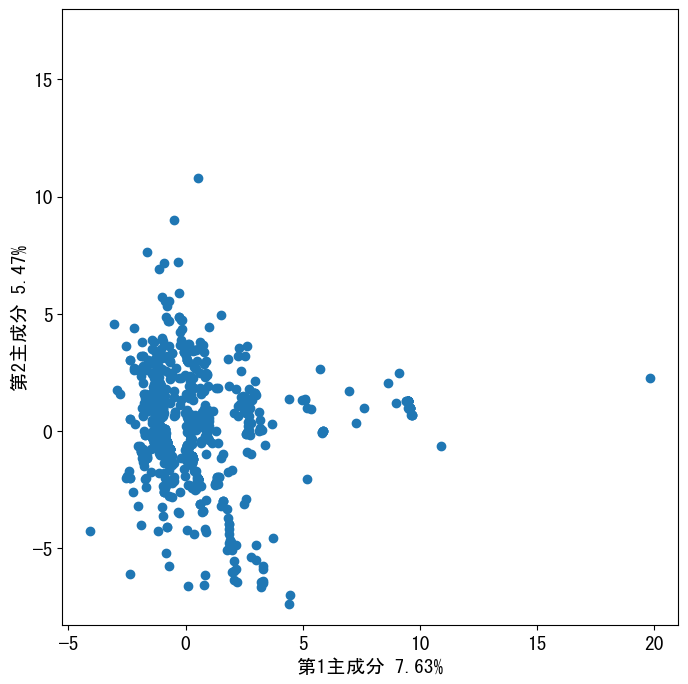

In [21]:
# 図5.2(a)　PCA第一主成分、第二主成分

plt.plot(T[:,0], T[:,1], 'o')

plt.xlabel('第1主成分 {:.2f}%'.format(ratio_[0]*100))
plt.ylabel('第2主成分 {:.2f}%'.format(ratio_[1]*100))

plt.axis('square')
plt.show()

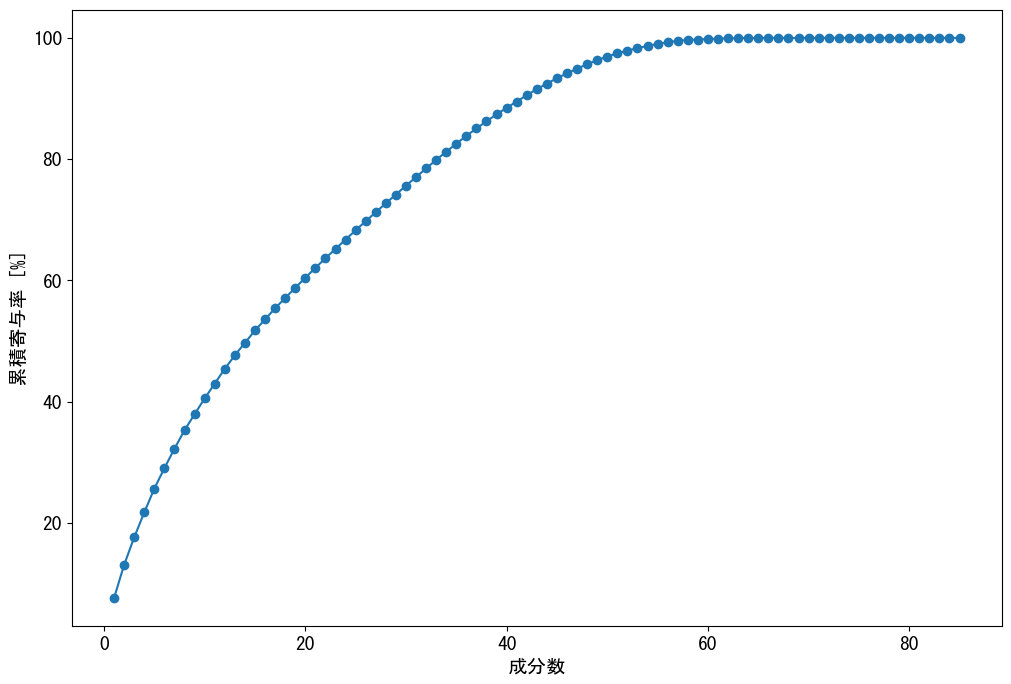

In [27]:
# 図5.2(b)　累積寄与率

from numpy import cumsum, arange

plt.figure()
plt.plot(arange(1,1+len(ratio_)), 100*cumsum( ratio_ ),'o-')
plt.xlabel('成分数')
plt.ylabel('累積寄与率 [%]')
plt.show()

### RDKit記述子

In [28]:
from rdkit.Chem import MolFromSmiles
from rdkit.Chem.Descriptors import descList
from pandas import read_csv
from numpy import array as np_array, matrix as np_matrix

In [33]:
df = pd.read_csv('../data/delaney-solubility/delaney-processed.csv')

In [35]:
list_functions = list(dict(descList).values())

In [36]:
def mol2rdkit_desc(mol):
    " RDKit descriptors "
    return list(map(lambda f: f(mol), list_functions))

In [37]:
func = mol2rdkit_desc

df['Mol'] = df.smiles.apply(MolFromSmiles)

X = df.Mol.apply(func)
X2 = np_array(X.tolist())

In [38]:
pca = make_pipeline(StandardScaler(), PCA())
T = pca.fit_transform(X2)

In [39]:
ratio_ = dict(pca.steps)['pca'].explained_variance_ratio_

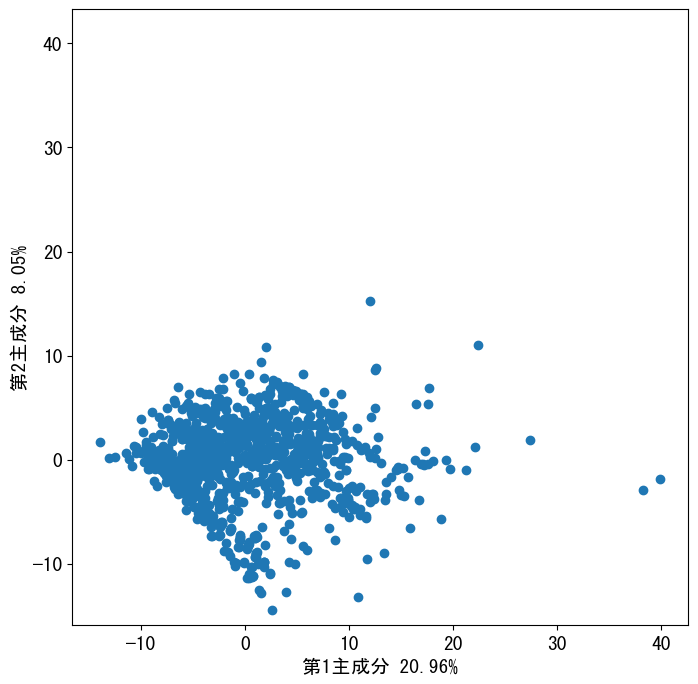

In [43]:
# 図5.3(a)　PCA第一主成分、第二主成分

plt.plot(T[:,0], T[:,1], 'o')

plt.xlabel('第1主成分 {:.2f}%'.format(ratio_[0]*100))
plt.ylabel('第2主成分 {:.2f}%'.format(ratio_[1]*100))
plt.axis('square')
plt.show()

Text(0, 0.5, '累積寄与率 [%]')

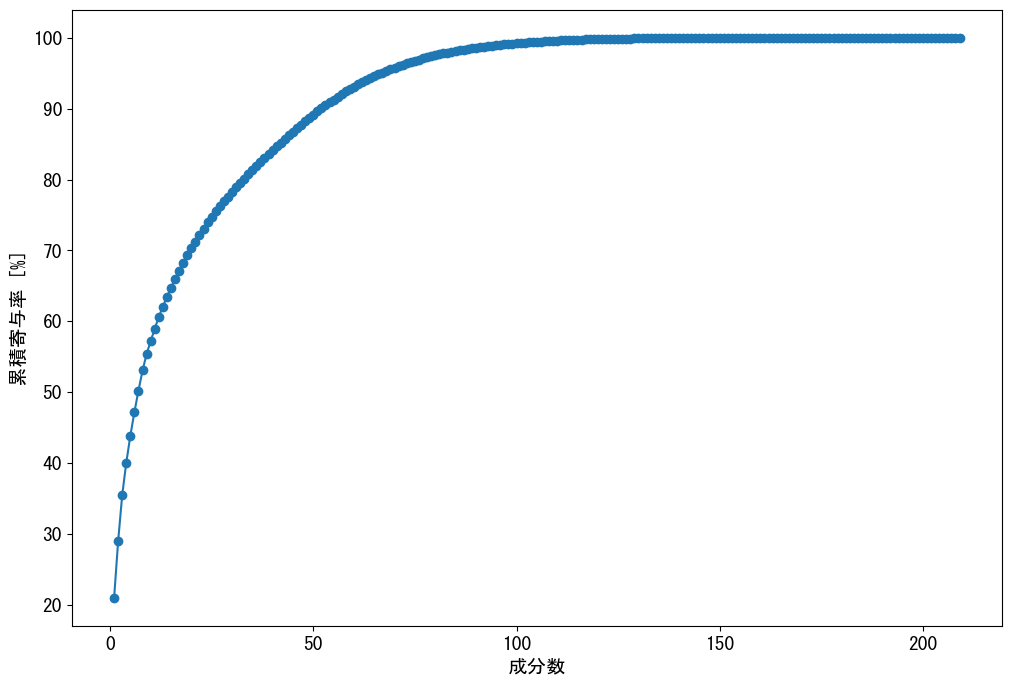

In [42]:
# 図5.3(b)　累積寄与率

plt.figure()
plt.plot(arange(1,1+len(ratio_)), 100*cumsum( ratio_ ),'o-')
plt.xlabel('成分数')
plt.ylabel('累積寄与率 [%]')

### MODERD

In [44]:
from mordred import Calculator as mord_calc, descriptors

In [45]:
df = read_csv('../data/delaney-solubility/delaney-processed.csv')
df['Mol'] = df.smiles.apply(MolFromSmiles)

In [46]:
calc2d = mord_calc(descriptors, ignore_3D=False)

In [47]:
descs2d = df.Mol.apply(calc2d)
dfX = calc2d.pandas(df.Mol)
print('data shape', dfX.shape)

100%|██████████| 1128/1128 [00:42<00:00, 26.80it/s]


data shape (1128, 1826)


In [49]:
# 標準化
sc = StandardScaler()
Xsc = sc.fit_transform(dfX)

is_nonnan = np.sum(np.isnan(Xsc), axis=0)==0

C:\Users\Matsunami\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\extmath.py:1047: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
C:\Users\Matsunami\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\extmath.py:1052: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
C:\Users\Matsunami\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\extmath.py:1072: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count


In [50]:
# 主成分分析
pca = make_pipeline(StandardScaler(),  PCA())
T = pca.fit_transform(dfX.iloc[:, np.where(is_nonnan)[0]])

In [51]:
#寄与率の計算
contrib_=pca.steps[-1][-1].explained_variance_ratio_

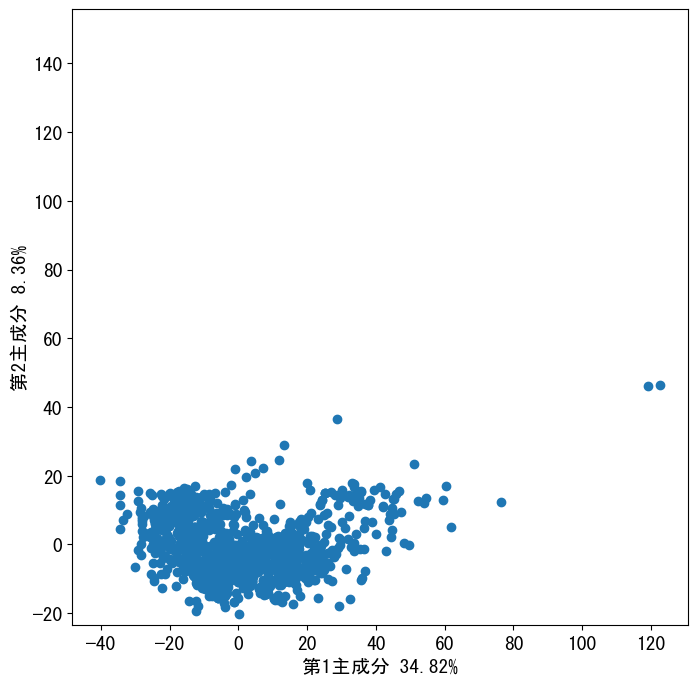

In [53]:
# 図5.4(a)　PCA第一主成分、第二主成分
plt.plot(*T[:,:2].T, 'o')

plt.xlabel('第1主成分 {:.2f}%'.format(100*contrib_[0]))
plt.ylabel('第2主成分 {:.2f}%'.format(100*contrib_[1]))
plt.axis('square')
plt.show()

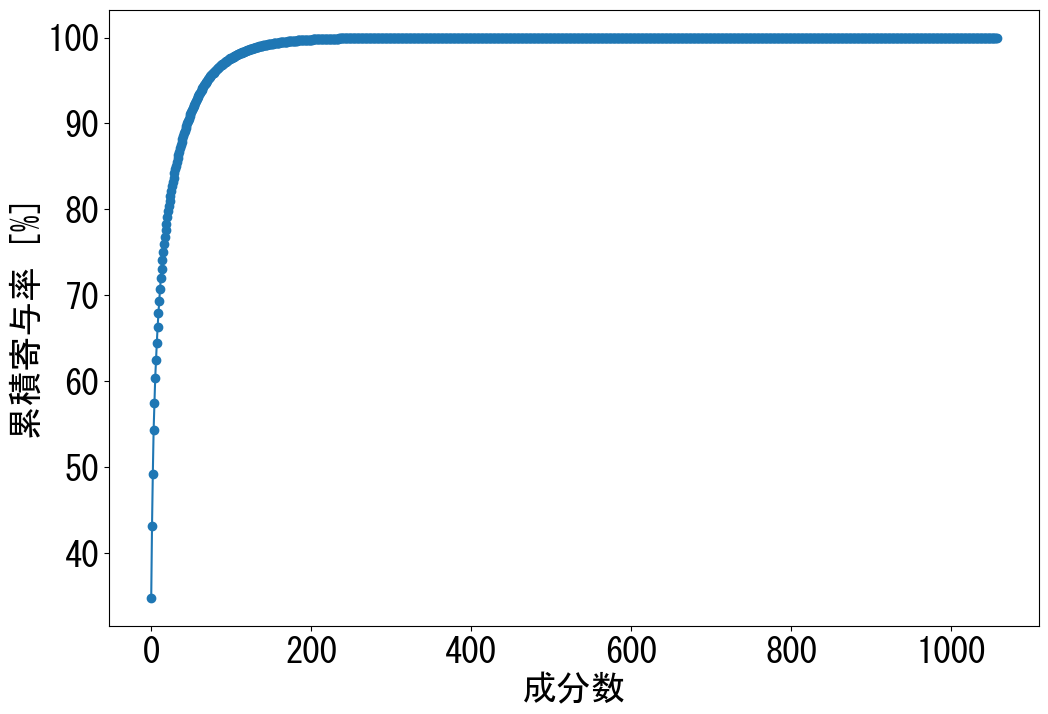

In [28]:
# 図5.4(b)　累積寄与率
plt.plot(np.cumsum(contrib_)*100, 'o-')
plt.xlabel('成分数')
plt.ylabel('累積寄与率 [%]')
plt.show()
